In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("../Scoring/feature_vector_scored.csv")
df.head()

,index,sequence_label,source,generator,chisqr_p,chisqr_X2.X-squared,chisqr_df.df,ks_p,ks_D.D,freq_p,...,perm_observed_stat,perm_p,entropy_val,fft_dominant_frequency,fft_dominant_period,fft_max_magnitude,uniformity_score,patterns_score,periodicity_score,randomness_score
0,1,randoms-1,QRNG,IBM Qiskit (Single-Qubit),0.000005,41.24,9,4.015142e-05,0.104000,0.000005,...,4.854,1.0,3.271215,0.096,10.416667,175.438884,0.818263,0.862599,0.336494,0.672452
1,2,randoms-10,QRNG,IBM Qiskit (Single-Qubit),0.000010,39.24,9,1.988713e-04,0.096000,0.000010,...,5.050,1.0,3.272462,0.338,2.958580,181.936266,0.764618,0.655328,0.344172,0.588039
2,3,randoms-100,PRNG,Linear Congruential Generator (LCG),0.989425,2.12,9,9.079986e-05,0.100000,0.989425,...,5.592,1.0,3.318868,0.500,2.000000,196.000000,0.294679,0.610392,0.134783,0.346618
3,4,randoms-101,PRNG,XORShift,0.337688,10.16,9,4.200665e-07,0.124000,0.337688,...,5.282,1.0,3.307208,0.054,18.518519,162.277093,0.696571,0.857378,0.121763,0.558571
4,5,randoms-102,PRNG,XORShift,0.040108,17.60,9,1.240019e-06,0.119556,0.040108,...,5.748,1.0,3.297016,0.338,2.958580,187.311277,0.863323,0.766339,0.228886,0.619516


In [3]:
features = [
    'chisqr_p', 'ks_p', 'freq_p', 'eqdist_diff',
    'gap_p', 'serial_autocorrelation',
    'entropy_val', 'fft_max_magnitude'
]

In [4]:
df['target'] = (df['source'] == 'QRNG').astype(int)

### Classifying on Raw features

In [5]:
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
lrc = LogisticRegression(max_iter=1000, random_state=42)
lrc.fit(X_train, y_train)
y_pred_lrc = lrc.predict(X_test)
y_prob_lrc = lrc.predict_proba(X_test)[:, 1]

In [7]:
roc_auc = roc_auc_score(y_test, y_prob_lrc)
report = classification_report(y_test, y_pred_lrc)

print("Logitstic Regression Classifier on Raw Features\n")
print(f"Classification Report: \n{report}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(features, lrc.coef_[0]):
    print(f"{feat}: {coef:.4f}")

Logitstic Regression Classifier on Raw Features

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

ROC-AUC: 1.0000

Feature Coefficients:
chisqr_p: -2.7177
ks_p: 0.0037
freq_p: -2.7177
eqdist_diff: -0.0183
gap_p: -0.0000
serial_autocorrelation: 0.1474
entropy_val: -0.4321
fft_max_magnitude: -0.0071


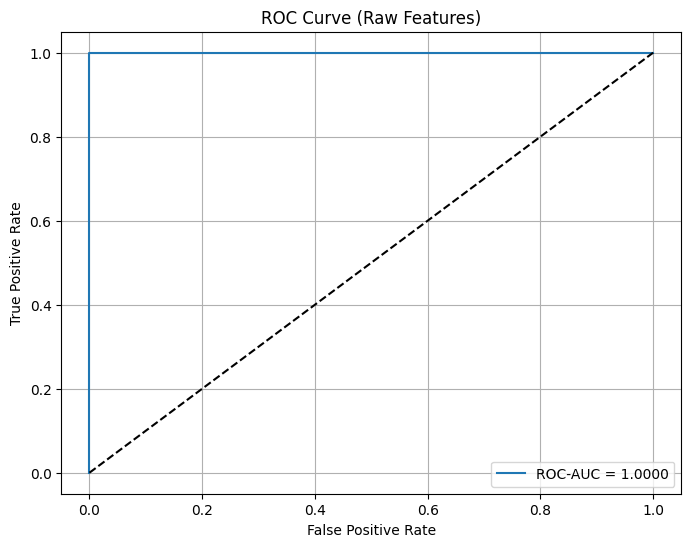

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lrc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Raw Features)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### Classifying on Random Scores

In [9]:
X_score = df[['randomness_score']]
X_score_train, X_score_test, y_train, y_test = train_test_split(X_score, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
lrc_score = LogisticRegression(max_iter=1000, random_state=42)
lrc_score.fit(X_score_train, y_train)
y_pred_lrc_score = lrc_score.predict(X_score_test)
y_prob_lrc_score = lrc_score.predict_proba(X_score_test)[:, 1]

In [11]:
report_clr_score = classification_report(y_test, y_pred_lrc_score)
roc_auc_score_only = roc_auc_score(y_test, y_prob_lrc_score)

print("\nLR Classifier on Randomness Score")
print(f"Classification Report: \n{report_clr_score}")
print(f"ROC-AUC: {roc_auc_score_only:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(features, lrc_score.coef_[0]):
    print(f"{feat}: {coef:.4f}")


LR Classifier on Randomness Score
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24

ROC-AUC: 0.9653

Feature Coefficients:
chisqr_p: 3.2501


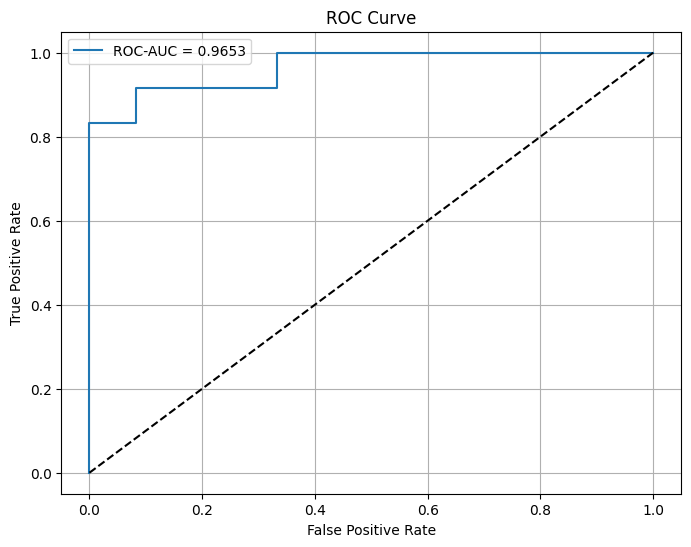

In [13]:
fpr_score, tpr_score, _ = roc_curve(y_test, y_prob_lrc_score)
plt.figure(figsize=(8, 6))
plt.plot(fpr_score, tpr_score, label=f"ROC-AUC = {roc_auc_score_only:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### Classifying with Threshold

In [14]:
threshold = 0.5
df['predicted_source'] = (df['randomness_score'] >= threshold).astype(int)
threshold_accuracy = accuracy_score(df['target'], df['predicted_source'])

print("\n=== Threshold Rule (Score >= 0.5) ===")
print(f"Threshold Accuracy: {threshold_accuracy:.4f}")


=== Threshold Rule (Score >= 0.5) ===
Threshold Accuracy: 0.8417


In [15]:
thresholds = np.linspace(0, 1, 100)
accuracies = [accuracy_score(df['target'], (df['randomness_score'] >= t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[np.argmax(accuracies)]
optimal_accuracy = max(accuracies)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal Accuracy: {optimal_accuracy:.4f}")

Optimal Threshold: 0.5455
Optimal Accuracy: 0.9000


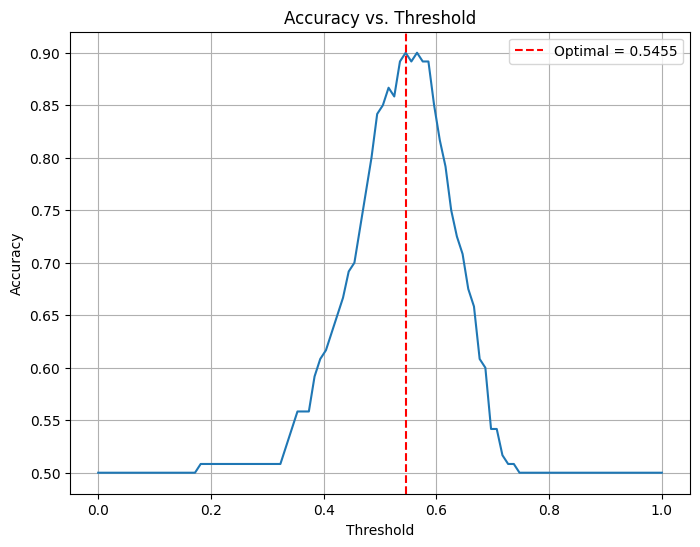

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies)
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f"Optimal = {optimal_threshold:.4f}")
plt.title("Accuracy vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()